In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import random

In [22]:
df1 = pd.read_csv('data/1step.csv', index_col='time')
df2 = pd.read_csv('data/2step.csv', index_col='time')

# int columns
df1.columns = [int(i) for i in df1.columns]
df1.columns = [int(i) for i in df2.columns]

df1.head()

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
time,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.000042,0.0,0.000000,0.0,0.0,0.000000,0.000086,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
0.2,0.0,0.000054,0.0,0.000000,0.0,0.0,0.000038,0.000040,0.000047,0.000000,...,0.0,0.0,0.000024,0.000000,0.0,0.00003,0.0,0.0,0.0,0.0
0.4,0.0,0.000049,0.0,0.000000,0.0,0.0,0.000000,0.000118,0.000087,0.000000,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0
0.6,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000136,0.000040,0.000000,...,0.0,0.0,0.000000,0.000036,0.0,0.00000,0.0,0.0,0.0,0.0
0.8,0.0,0.000068,0.0,0.000038,0.0,0.0,0.000095,0.000144,0.000000,0.000074,...,0.0,0.0,0.000000,0.000000,0.0,0.00000,0.0,0.0,0.0,0.0


In [23]:
df1_sum = df1.agg(['sum'])
df2_sum = df2.agg(['sum'])

df1_sum

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
sum,0.940135,0.630331,0.542271,0.643056,0.472693,0.470537,0.734837,1.242453,1.278191,0.682656,...,0.07738,0.084201,0.084193,0.087031,0.082239,0.085627,0.086307,0.081986,0.085949,0.083221


In [24]:
df2_sum

,2,3,4,5,6,7,8,9,10,11,...,306,307,308,309,310,311,312,313,314,315
sum,0.646057,0.412035,0.354632,0.416901,0.313915,0.346982,0.600224,0.961662,0.974163,0.506941,...,0.051956,0.056867,0.055967,0.055776,0.056201,0.057414,0.054718,0.054821,0.053436,0.053705


In [25]:
# rescaling w.r.t NH3 (17)
df_sum = df1_sum.T
df_sum = df_sum.rename(columns={'sum':'1step'})
df_sum['2step'] = df2_sum.T.values
df_sum  = df_sum.reset_index()
df_sum

,index,1step,2step
0,2,0.940135,0.646057
1,3,0.630331,0.412035
2,4,0.542271,0.354632
3,5,0.643056,0.416901
4,6,0.472693,0.313915
...,...,...,...
309,311,0.085627,0.057414
310,312,0.086307,0.054718
311,313,0.081986,0.054821
312,314,0.085949,0.053436


In [26]:
df_sum['1step_sacled'] = df_sum['1step'].apply(lambda x: x/df_sum.iloc[38]['1step'])
df_sum['2step_sacled'] = df_sum['2step'].apply(lambda x: x/df_sum.iloc[38]['2step'])
df_sum.head()

,index,1step,2step,1step_sacled,2step_sacled
0,2,0.940135,0.646057,0.000012,0.000012
1,3,0.630331,0.412035,0.000008,0.000008
2,4,0.542271,0.354632,0.000007,0.000007
3,5,0.643056,0.416901,0.000008,0.000008
4,6,0.472693,0.313915,0.000006,0.000006


In [27]:
df_sum.iloc[17]

index           19.000000
1step           26.181773
2step           15.943554
1step_sacled     0.000344
2step_sacled     0.000292
Name: 17, dtype: float64

In [28]:
# random color generator
random.seed(315)
colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(20)]

In [ ]:
# w.r.t the amount of injected NH3
# intensity change of NH3 (17)
plt.figure(figsize=(12,3))
plt.plot(df1.loc[:,17],'.-', color=colors[1])
plt.xlabel('Time [s]')
plt.xlim(3000,df.index[-1])
plt.ylabel('intensity [a.u.]')
plt.title('NH3 during the 1-step process')
plt.show()

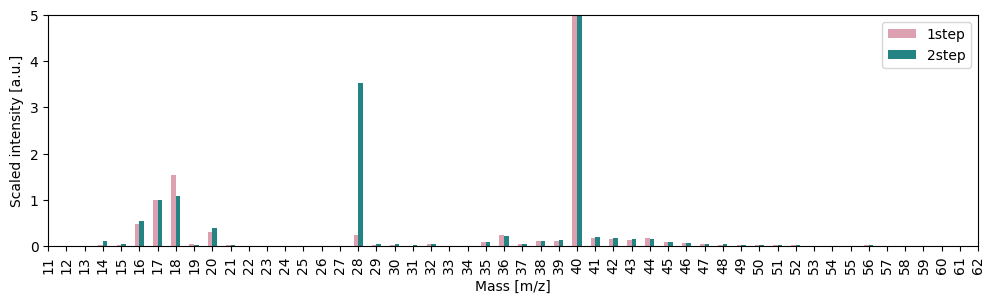

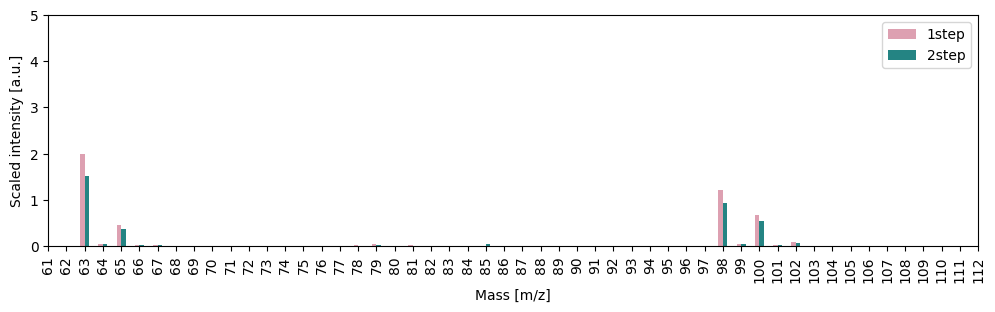

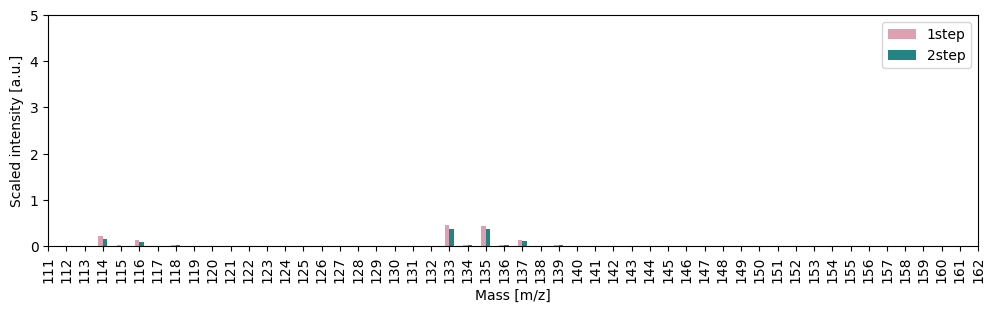

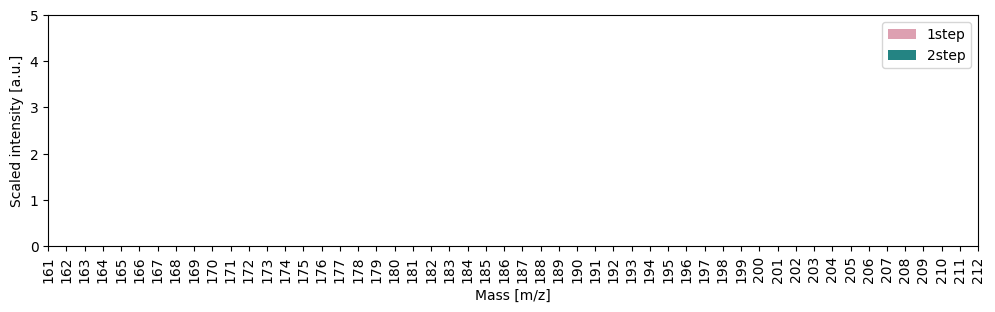

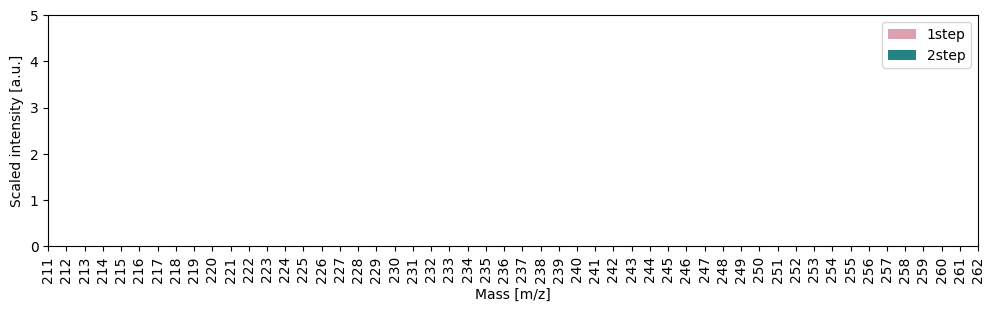

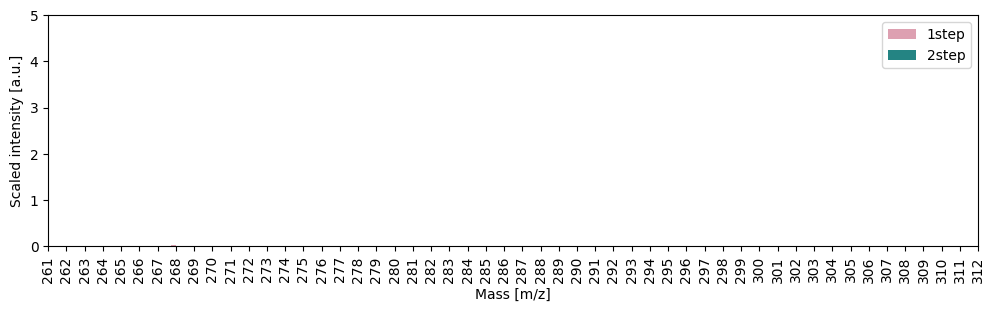

In [20]:
for i in range(6):
    axs = df_sum.plot(figsize=(12,3), x='index', y=['1step', '2step'], kind='bar', color=[colors[0], colors[1]])
    plt.xlim([10+50*i-1, 10+50*(i+1)])
    plt.ylim(0,5)
    plt.xlabel('Mass [m/z]')
    plt.ylabel('Scaled intensity [a.u.]')
    # plt.title('Comparison between the Max Mass Spectra')
    plt.show()

    # fig = axs.get_figure()
    # fig.savefig(f'data/figure/1step_prepost{i}', bbox_inches='tight')